In [1]:
import torch

D:\ProgramData\Anaconda3\envs\py1.9.0\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(torch.cuda.is_available()) # Check if CUDA is available
print(torch.cuda.device_count()) # Check the number of CUDA available
print(torch.version.cuda) # Check the version number of CUDA
print(torch.cuda.device_count())

True
1
11.1
1


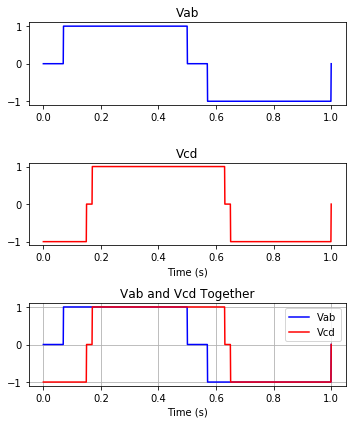

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# parameter settings
D1 = 0.14
D2 = 0.04
D_phi = 0.2
T_hs = 0.5
T = 2 * T_hs
t = np.linspace(0, T, 1000)

# Primary side bridge arm voltage Vab
Vab = np.zeros_like(t)
Vab[(D1 * T_hs <= t) & (t < T_hs)] = 1
Vab[((1 + D1) * T_hs <= t) & (t < T)] = -1

# Secondary side bridge arm voltage Vcd
Vcd = np.zeros_like(t)
Vcd[((D1 + D_phi) * T_hs <= t) & (t < (D1 + D_phi + 1 - 2 * D2) * T_hs)] = 1
Vcd[(t < (D1 + D_phi - D2) * T_hs) | (((1 + D1 + D_phi - D2) * T_hs <= t) & (t < T))] = -1

# Draw waveform
plt.figure(figsize=(5, 6))  # Adjusted figure size for better layout
plt.subplot(3, 1, 1)
plt.plot(t, Vab, 'b', linewidth=1.5)
plt.ylim([-1.1, 1.1])
plt.title('Vab')

plt.subplot(3, 1, 2)
plt.plot(t, Vcd, 'r', linewidth=1.5)
plt.ylim([-1.1, 1.1])
plt.title('Vcd')
plt.xlabel('Time (s)')

plt.subplot(3, 1, 3)
plt.plot(t, Vab, 'b', label='Vab', linewidth=1.5)
plt.plot(t, Vcd, 'r', label='Vcd', linewidth=1.5)
plt.ylim([-1.1, 1.1])
plt.title('Vab and Vcd Together')
plt.grid(True)
plt.xlabel('Time (s)')
plt.legend()

# Adjust the vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)  # Increase the vertical space

plt.tight_layout()
plt.show()

# 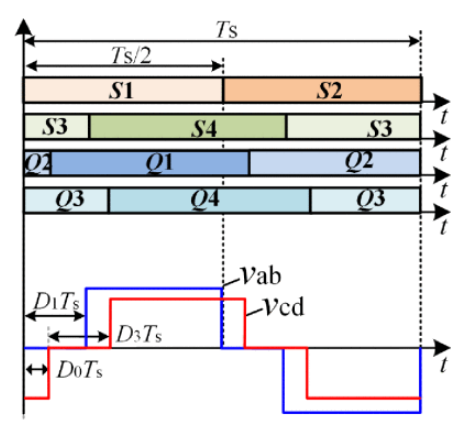
Typical waveforms of the DAB converter with TPS.